# Deep Computer Vision Using Convolutional Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-02-16 23:23:12.401568: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-16 23:23:12.549197: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-16 23:23:12.550203: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-16 23:23:13.984594: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

## The Architecture of the Visual Cortex

## Convolutional Layers

### Filters

### Stacking Multiple Feature Maps

### TensorFlow Implementation

In TensorFlow, each input image is represented as a 3D Tensor of shape [*height, width, channels*]. A mini-batch is represented as a 4D Tensor of shape [*mini-batch size, height, width, channels*]. The weights of the convolutional layer are represented as a 4D tensor of shape [*$f_h,f_w, f_{n'}, f_n$*]. 

The bias term of a convolutional layer are simply represented as a 1D tensor of shape [*$f_n$*].

The following code load two color images, then create two filters and applies them to both images, and finally displays one of the resulting feature maps.

In [3]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [17]:
china

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

In [18]:
china.shape

(427, 640, 3)

Image has 427 slices. With each slice having 640 rows and 3 columns.

In [12]:
# create 2 filters
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)

In [21]:
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [22]:
filters.shape

(7, 7, 3, 2)

[Quite Simple and intutive explanation on how 4D array works](https://stackoverflow.com/a/47143492/16273741)

So basically [7, 7, 3, 2] is a 7x7 matrix which contains matrices of each matrix having shape 3x2.

In [28]:
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

Cross verifying that 0th index of all the matrices of 3rd column of 7x7 matrix has been changed to 1.

In [29]:
filters[:, 3]

array([[[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

Cross verifying that 1st index of all the matrices of 3rd row of 7x7 matrix has been changed to 1.

In [31]:
filters[3, :]

array([[[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]]], dtype=float32)

In [32]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In `tf.nn.conv2d`:

- `images` is the input mini-batch (a 4D Tensor)
- `filters` is set of filters to apply (also a 4D Tensor)
- `strides` is equal to 1, but it could also be a 1D array with four elements, where two central elements are the vertical ahd horizontal strides ($s_h$ and $s_w$). The first and last elements must be equal to 1. They may one day be used to specify a batch stride (to skip some instances) and a channel stride (to skip some of the previous layer's feature maps or channels).
- `padding` must be either `"same"` or `"valid"`:
    - If set to `"same"`, the convolutional layer uses zero padding if necessary. When `strides=1`, the layer's outputs will have the same spatial dimenstions (width and height) as its inputs, hence the name `same`.
    - If set to `"valid"`, the convolutional layer does not use zero padding and may ignore some rows and columns at bottom and right of the input image, depending on the stride. 
    
    
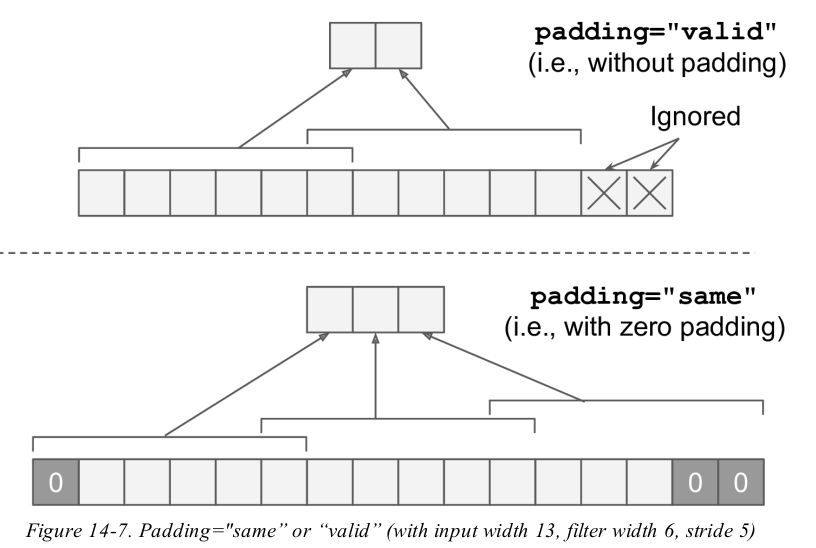

In [33]:
outputs.shape

TensorShape([2, 427, 640, 2])

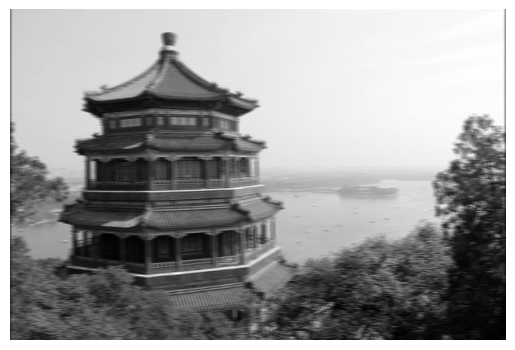

In [35]:
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st images 2nd feature map.
plt.axis("off")
plt.show()

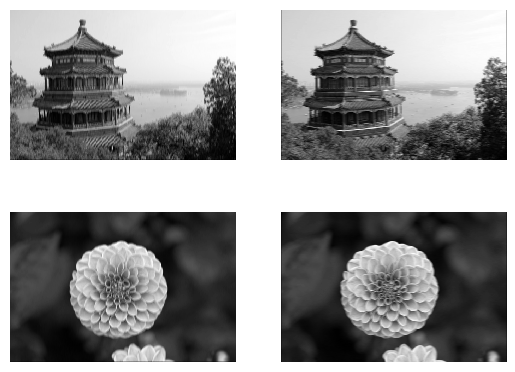

In [42]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])
        
plt.show()

In [5]:
def crop(images):
    return images[150:200, 130:250]

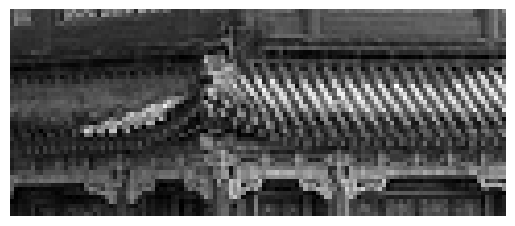

In [45]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

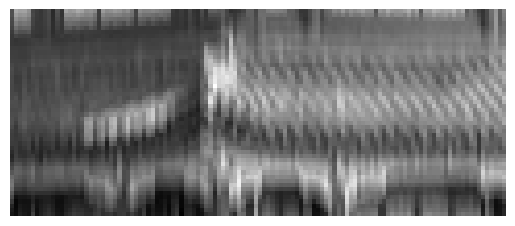

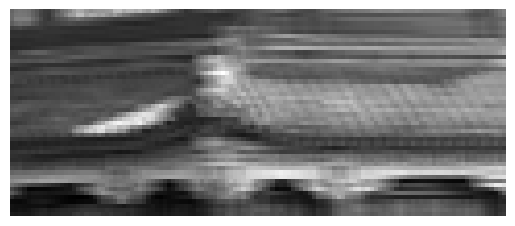

In [48]:
for feature_map_index, name in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

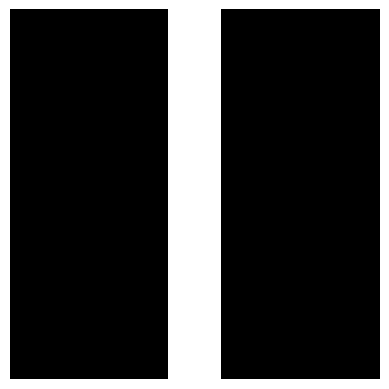

In [49]:
plot_image(filters[:, :, 0, 0])

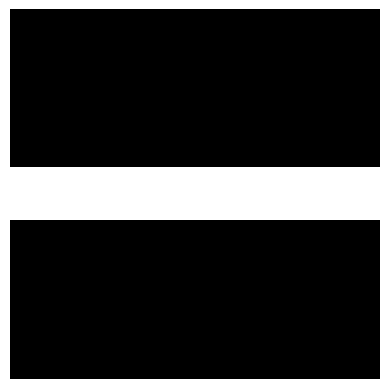

In [50]:
plot_image(filters[:, :, 0, 1])

In this example we manually defined the filters, but in real CNN we would normally define filters as trainable so the neural net can learn which filter works best. Instead of manually creating the variables, use the `keras.layers.Conv2D` layer:

In [51]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

This code creates a Conv2D layer with 32 filters, each 3x3, using a stride of 1 (both horizontally and vertically) and "same" padding, and applying the ReLU activation function to its outputs. 

Convolutional layers has quite a few hyperparameters: we must choose the number of filters, their height and width, the strides and the padding type. 

### Memory Requirements

**TIP:**

If training crashes because of an out-of-memory error, we can try reducing the mini-batch size. Alternatively, we can try reducing dimensionality using a stride, or removing few layers. Or we can try using 16-bit floats instead of 32-bit floats. Or we could distribute the CNN across multiple devices.

## Pooling Layer

### Tensorflow Implementation

The following code creates a max pooling layer using a 2x2 kernel. The stride default to kernel size, so this layer will use a stride of 2 (both horizontally and vertically). By default it uses `"valid"` padding (i.e., no padding at all):

In [2]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

To create an *average pooling layer*, we just use `AvgPool2D` instead of `MaxPool2D`. 

In [6]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

In [7]:
output.shape

TensorShape([2, 25, 60, 3])

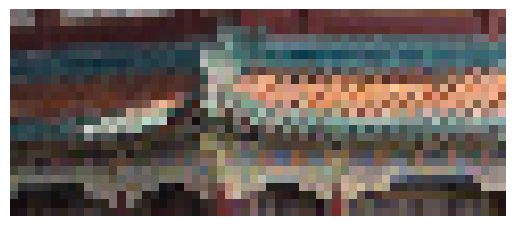

In [8]:
plot_image(output[0])

### Depth-wise Pooling

Keras does not include depth wise max-pooling layer, but TensorFlow's low-level Deep Learning API does: just use the `tf.nn.max_pool()` layer, and specify the kernel size and strides as a 4-tuples(i.e, tuples of size 4). The first three values of each should be 1: this indicates that the kernel size and stride along the batch, height, and width dimenstions should be 1. The last value should be whatever kernel size and stride we want along the depth dimension - for eg, 3 (this must be divisor of the input depth; it will not work if the previous layer outputs 20 feature maps, since 20 is not a multiple of 3):

In [14]:
output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3), strides=(1,1,1,3), padding="VALID")

In [15]:
output.shape

TensorShape([2, 427, 640, 1])

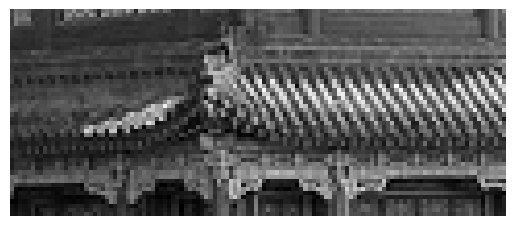

In [16]:
plot_image(crop(output[0]))

If we want to include this layer in your Keras models, wrap it in a `Lambda` layer (or create a custom Keras layer):

In [17]:
depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3),
                                                          padding="VALID"))

To create such a layer, simply use the `keras.layers.GlobalAvgPool2D` class:

In [19]:
global_avg_pool = keras.layers.GlobalAvgPool2D()

In [20]:
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.28310943, 0.2441023 , 0.22670619],
       [0.48978567, 0.4544353 , 0.34281188]], dtype=float32)>

## CNN Architectures

Here's how we can implement a simple CNN to tackle a Fashion MNIST dataset:

In [23]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [24]:
X_train.shape, X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [29]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [37]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation="relu", padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dense(0.5),
    keras.layers.Dense(units=10, activation="softmax"),
])

- The first layer uses 64 fairly large filters (7x7) but no stride because the input images are not very large. It also sets `input_shape=[28,28,1]` because the images are 28x28 with single color channel (i.e., grayscale)
- Next we have a max pooling layer which uses a pool size of 2, so it divides each spatial dimension by a factor of 2.
- Then we repeat the same structure twice: two convolutional layers followed by a max pooling layer. For larger images, we could repeat this structure several more times (the number of repetitions is a hyperparameter that we can tune)
- Note that the number of filters grows up as we climb up to the CNN towards the output layer (it is initially 64, then 128, then 256): it makes sense to grow since the number of low-level features is often fairly low (e.g., small circles, horizontal lines). It is common practice to double the number of filters after each pooling layer: since each pooling layer divides each spatial dimension by a factor of 2.
- Next is fully connected layer , composed of two hidden dense layers and a dense output layer. Note that we must flatten its inputs, since the network expects a 1D array of features for each instance. We also added two dropout layers, with a drop rate of 50% each to reduce the overfitting.

In [38]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
h = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/5


2024-01-18 15:30:53.353938: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 395s 229ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 2/5
1719/1719 [==============================] - 387s 225ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 3/5
1719/1719 [==============================] - 387s 225ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 4/5
1719/1719 [==============================] - 392s 228ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 5/5
1/1 [==============================] - 0s 263ms/step


### LeNet-5

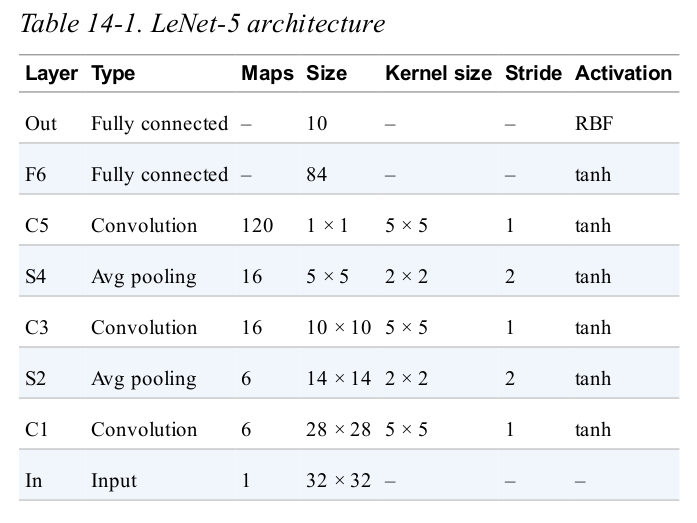

### AlexNet

Developed by Alex Krizhevsky(hence the name), Ilya Sutskever, and Geoffrey Hinton [All legends].

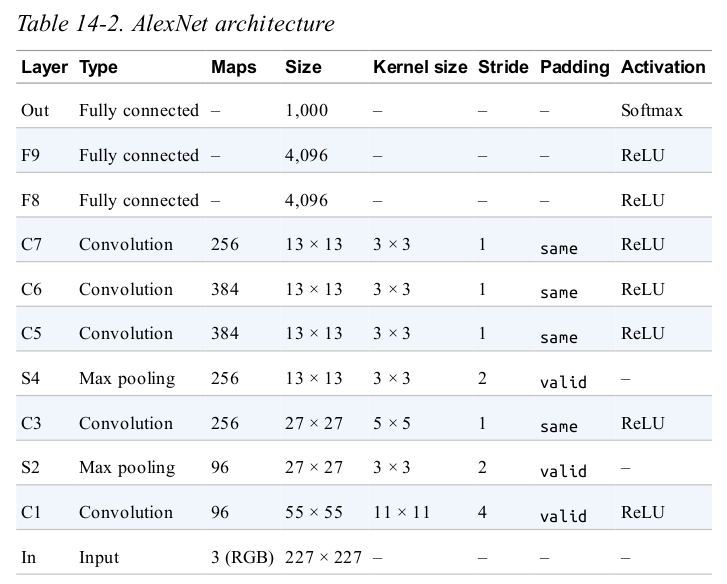

In AlexNet, the hyperparameters are set as follows: $r = 2, \alpha = 0.00002, \beta = 0.75, k = 1$. 

Local Response Normalization can be implemented using `tf.nn.local_response_normalization()` function (which we can wrap in a `Lambda` layer if we want to use it in a Keras model).

A variant of AlexNet called ZFNet developed by Matthew Zeiler
and Rob Fergus and won the 2013 ILSVRC challenge. It is essentially AlexNet with few tweaked hyperparameters.

### GoogLeNet

Developed by Christian Szegedy and won 2014 ILSVRC challenge. 

**Architecture:**

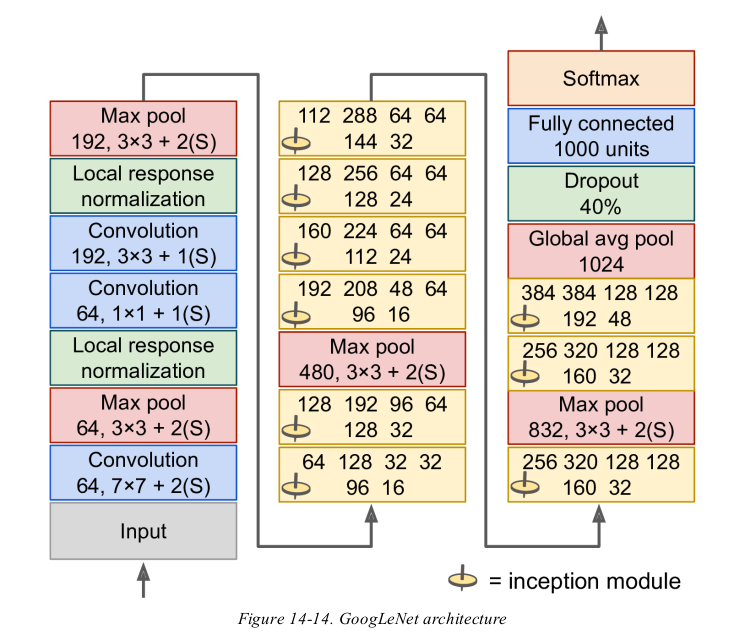

Let's go through the network:

- The first two layers divide the image's height and width by 4 (so its area is divided by 16), to reduce the computational load. The first layer uses the large kernel size so that much of the information is preserved.
- Then Local repose normalization layer ensures that the pervious layer learn a wide variety of features. 
- Two convolutional layers follow, where the first acts like a bottleneck layer.
- Again, a local response normalization layer ensures that the previous layers capture a wide variety of patterns.
- Next, a max pooling layer reduces the image height and width by 2, again to speed up computations.
- Then comes a tall stack of nine inception modules, interleaved with a couple of max pooling layers to reduce dimensionality and speed up the net. 
- Next, the global average pooling layer outputs the mean of each feature map.

This diagram is slightly simplified.

Several variants of GoogLeNet architecture was later proposed by Google researchers, including Inception-v3 and Inception-v4, using slightly different inception modules and reaching even better performance.

### VGGNet

Runner up in ILSVRC 2014 challenge, developed by Karen Simonyan and Andrew Zisserman from the Visual Geometry Group (VGG) research lab at Oxford University.

### ResNet

Kaiming He et al. won ILSVRC 2015 challenge. 

ResNet's architecture is simple. It starts and ends exactly like GoogLeNet (except with a dropout layer), and in between is just a very deep stack of simple residual units. Each residual unit is composed of two convolutional layers (and no pooling layers!), with Batch Normalization (BN) and ReLU activation, using 3x3 kernels and preserving spatial dimensions (stride 1, `"same"` padding).

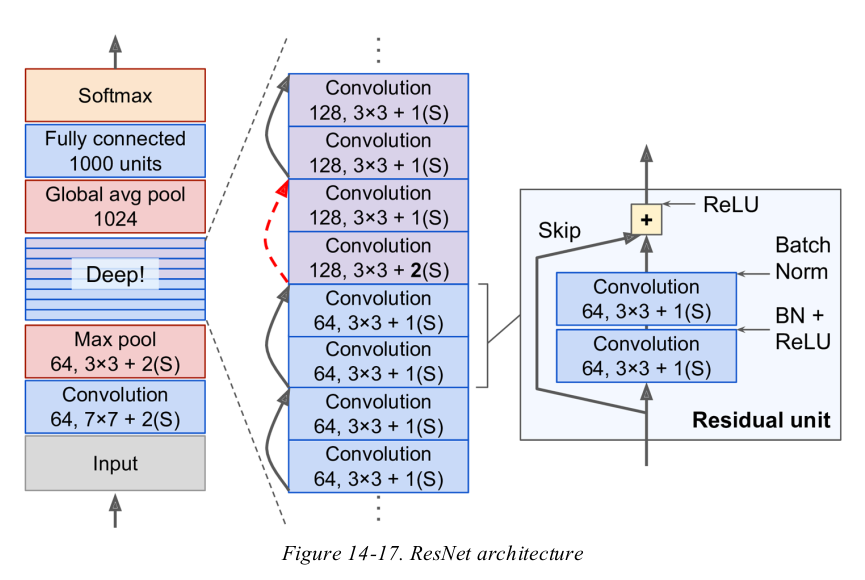

Note that the number of feature maps is doubled every few residual units, at the same time as their height and width are halved (using a convolutional layer with stride 2). When this happens, the inputs cannot be added directly to the outputs of the residual unit because they don't have same shape (for example, this problem affects the skip connection represented by dashed arrow in above figure). To solve this problem, the inputs are passed through a 1x1 convolutional layer with stride 2 and the right number of output featre maps (see below figure):

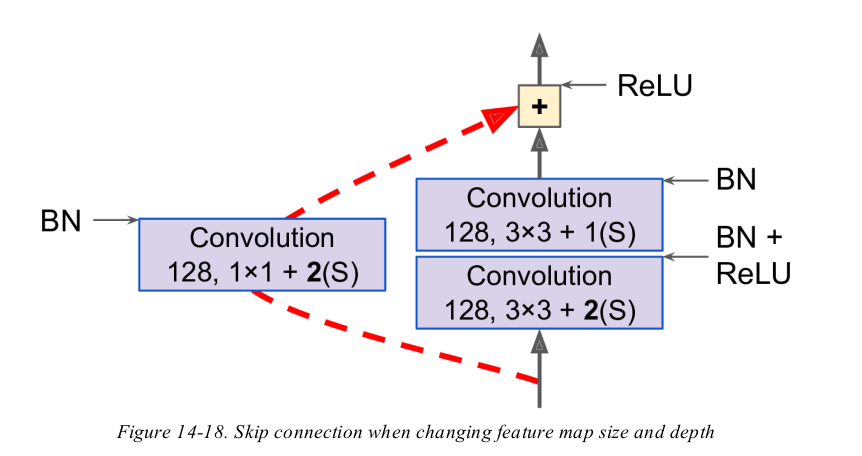

ResNet-34 is the ResNet with 34 layers (only counting the convolutional layers and the fully connected layer) containing 3 residual units that output 64 feature maps, 4RUs with 128 maps, 6 RUs with 256 maps, and 3 RUs with 512 maps.

ResNets deeper than that, such as ResNet-152, use slightly different residual units. Instead of two 3x3 convolutional layer with, say, 256 feature maps, they use three convolutional layers: first a 1x1 convolutional layer with just 64 maps (4 times less), which acts as a bottleneck layer, then a 3x3 layer with 64 maps, and finally another 1x1 convolutional layer with 256 maps (4 times 64) that restores the original depth. ResNet-152 contains 3 such RUs that output 256 maps, then 8 RUs with 512 maps, a whooping 36 Rus with 1024 maps, and finally 3 RUs with 2048 maps.
 

### Xception

Another variant of GoogLeNet Architecture. It stands for *Extreme Inception*. Proposed by Francios Chollet (author of Keras). 

While a regular convolutional layer uses filter that try to simultaneously capture spatial patterns (e.g., an oval) and cross-channel patterns (e.g., mouth + nose + eyes = face), a separable convolutional layer makes the strong assumption that spatial patterns and cross-channel patterns can be modeled seperately. See below figure:

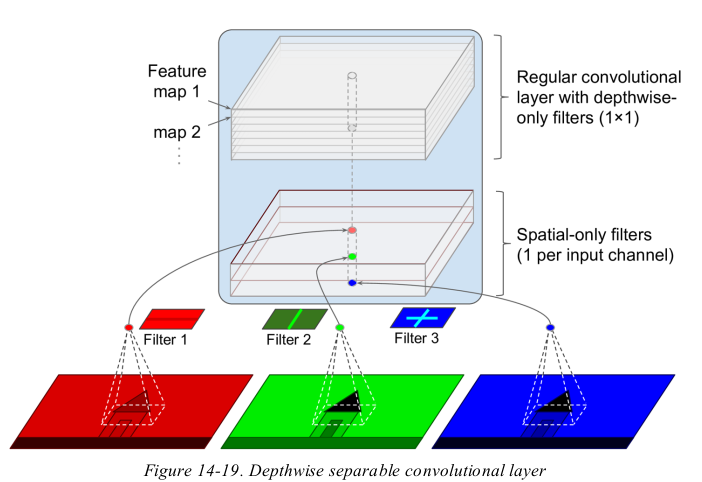

Thus, it is composed of two parts: the first part applies a single spatial filter for each input feature map, then the second part looks exclusively for cross-channel patterns - it is just a regular convolutional layer with 1x1 filters.

Since seperable convolutional layers only have one spatial filter per input channel, we should avoid them after layers that have too few channels, such as input layer. For this reason, the Xception architecture starts with 2 regular convolutional layers, but then the rest of the architecture uses only seperable covolution (34 in all), plus a few max pooling layers and the usual final layers (a global average pooling layer and a dense output layer).

### SENET

Winning architecture of ILSVRC 2017. 

## Implementing a ResNet-34 CNN using Keras

In [7]:
# First let's create a ResidualUnit layer

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),
                keras.layers.BatchNormalization()
            ]
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
            skip_Z = inputs
            for layer in self.skip_layers:
                skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

This code matches the architecture pretty closely.

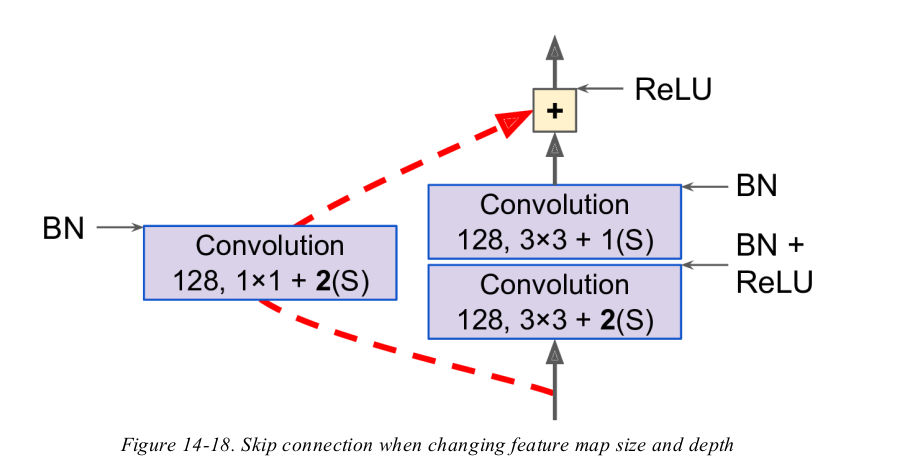

In the constructor, we create all the layers we will need: the main layers are the ones on the right side of the diagram, and the skip layers are the ones on the left (only needed if the stride is greater than 1). Then in `call()` method, we make the inputs go through the main layers and the skip layers (if any), then we add both outputs and apply the activation function.

Next we can build the ResNet-34 using a Sequential model, since it's really just a long sequence of layers (we can treat each residual unit as a single layer now that we have the `ResidualUnit` class).

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224,224,3], padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters=64

for filters in [64]*3 + [128]*4 + [256]*6 + [512]*3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      9408      
                                                                 
 batch_normalization_2 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 residual_unit_1 (ResidualU  (None, 56, 56, 64)        74240     
 nit)                                                            
                                                      

## Using Pretrained Models from Keras

Loading ResNet-50 model, pretrained on ImageNet:

In [19]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

This will create a ResNet-50 model and download weights pretrained on ImageNet dataset. To use it, we first need to ensure that the images have the right size. A ResNet-50 model expects a 224x224 pixel images. So first we need to resize the images.

In [24]:
images.shape

(2, 427, 640, 3)

There are 2 images of size 640x427 having 3 channels.

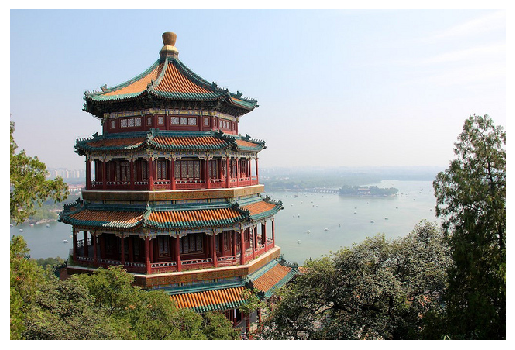

In [25]:
plot_color_image(images[0])

In [26]:
images_resized = tf.image.resize(images, [224,244])

In [22]:
images_resized

<tf.Tensor: shape=(2, 224, 244, 3), dtype=float32, numpy=
array([[[[6.8024099e-01, 7.8612334e-01, 9.0377039e-01],
         [6.8235296e-01, 7.8823531e-01, 9.0588236e-01],
         [6.8423188e-01, 7.9011422e-01, 9.0776128e-01],
         ...,
         [9.7040439e-01, 9.7432595e-01, 9.9393380e-01],
         [9.7824752e-01, 9.8216909e-01, 9.9878711e-01],
         [9.8216909e-01, 9.8609066e-01, 1.0000000e+00]],

        [[6.8376225e-01, 7.8964460e-01, 9.0729165e-01],
         [6.8315005e-01, 7.8903240e-01, 9.0667945e-01],
         [6.8486524e-01, 7.9074758e-01, 9.0839463e-01],
         ...,
         [9.8180145e-01, 9.8572302e-01, 9.9859071e-01],
         [9.8714381e-01, 9.9106538e-01, 1.0000000e+00],
         [9.8823529e-01, 9.9215686e-01, 1.0000000e+00]],

        [[6.8339461e-01, 7.8719366e-01, 9.0196079e-01],
         [6.8731618e-01, 7.9111522e-01, 9.0588236e-01],
         [6.8852311e-01, 7.9232210e-01, 9.0708929e-01],
         ...,
         [9.8639709e-01, 9.8927695e-01, 9.9503678e-01],


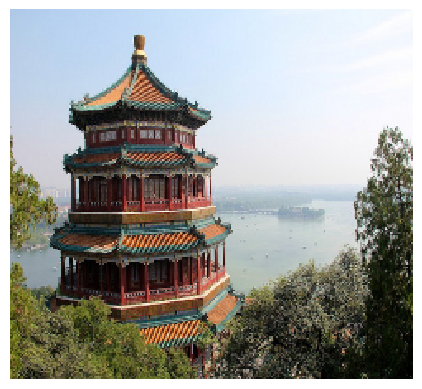

In [27]:
plot_color_image(images_resized[0])
plt.show()

**NOTE:**

The `tf.image.resize()` will not preserve the aspect ratio. Thus better to use `tf.image.crop_and_resize()`

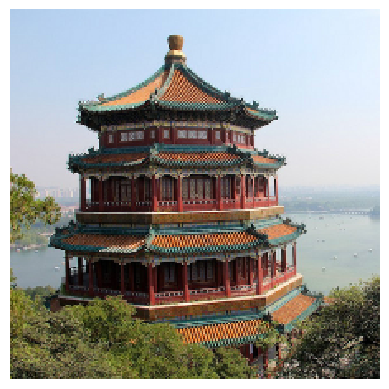

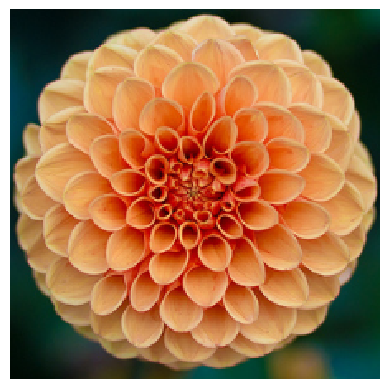

In [28]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0,1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

The pretrained models assumes that the images are preprocessed in a specific way. In some cases they may expect the inputs to be scaled from 0 to 1, or -1 to 1 and so on. Each model provides a `preprocess_input()` function that we can use to preprocess our images. These functions assume that the pixel values range from 0-255, so we must multipliy them 255 (since earlier we scaled them to 0-1 range):

In [29]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [30]:
inputs

<tf.Tensor: shape=(2, 224, 224, 3), dtype=float32, numpy=
array([[[[ 129.061   ,   86.221   ,   50.66001 ],
         [ 129.02844 ,   86.18845 ,   52.287453],
         [ 128.95612 ,   86.11611 ,   52.21511 ],
         ...,
         [ 147.4711  ,  127.221   ,  105.730095],
         [ 149.061   ,  127.221   ,  106.32    ],
         [ 150.061   ,  128.22101 ,  107.32    ]],

        [[ 129.1413  ,   86.30132 ,   52.251442],
         [ 129.97131 ,   87.13131 ,   53.23031 ],
         [ 129.97131 ,   87.13131 ,   53.23031 ],
         ...,
         [ 148.19476 ,  126.963036,  107.622   ],
         [ 149.061   ,  126.31069 ,  109.14063 ],
         [ 150.061   ,  127.31069 ,  110.14063 ]],

        [[ 129.92148 ,   87.08149 ,   53.18049 ],
         [ 129.24036 ,   86.40037 ,   52.499367],
         [ 129.24036 ,   86.40037 ,   52.499367],
         ...,
         [ 149.061   ,  126.221   ,  109.32    ],
         [ 148.77994 ,  126.76057 ,  109.859566],
         [ 149.24036 ,  127.221   ,  110.74677

Now we can use the pretrained model to make predictions:

In [31]:
Y_proba = model.predict(inputs)

1/1 [==============================] - 1s 1s/step


In [32]:
Y_proba.shape

(2, 1000)

As usual, the output `Y_proba` is a matrix with one row per image and one column per class (in this case, there are 1000 classes).

In [33]:
Y_proba

array([[7.3548043e-09, 2.1552951e-08, 7.4698709e-09, ..., 1.7062369e-09,
        1.1173279e-07, 3.3828613e-08],
       [2.3477301e-07, 7.0271622e-06, 4.0480541e-07, ..., 5.4023112e-05,
        3.6675730e-05, 1.3372404e-04]], dtype=float32)

We can display the top *K* predictions, including the class name and the estimated probability of each predicted class, using the `decode_predictions()` function. For each image it returns an array containing top K predictions, where each prediction is represented as an array containing the class indentifier, its name and the corresponding confidence score.

In [34]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print(f"Image #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
        print("{} - {:12s} {:.2f}".format(class_id, name, y_proba * 100))
    print()

35363/35363 [==============================] - 0s 2us/step
Image #0
n03877845 - palace       43.39
n02825657 - bell_cote    43.07
n03781244 - monastery    11.70

Image #1
n04522168 - vase         53.96
n07930864 - cup          9.52
n11939491 - daisy        4.97



In [35]:
top_K

[[('n03877845', 'palace', 0.4339356),
  ('n02825657', 'bell_cote', 0.43074515),
  ('n03781244', 'monastery', 0.11695045)],
 [('n04522168', 'vase', 0.5396452),
  ('n07930864', 'cup', 0.09524105),
  ('n11939491', 'daisy', 0.049664237)]]

The correct classes (monastery and daisy) appear in top three results for both images. That's pretty good, considering that model had to choose from 1000 classes. 

Other vision models available are ResNet variants, GoogLeNet variants like Inception-v3 and Xception, VGGNet variants and MobileNet and MobileNetV2 (lightweight models for use in mobile applications).

But what if we want to use an image classifier for class of images that are not part of ImageNet? In that case, we may still benefit from the pretrained models to perform transfer learning.

## Pretrained Models for Transfer Learning

If we want to build an image classifier but we do not have enough training data, then it is often good to reuse the lower layers of a pretrained models. 

For example, let's train a model to classify pictures of flowers, reusing a pretrained Xception model.

First let's load the dataset using the Tensorflow Datasets:

In [4]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

In [38]:
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/home/dell/tensorflow_datasets/tf_flowers/3.0.1.incompleteTFVEAM',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [5]:
dataset_size = info.splits["train"].num_examples # 3670
class_names = info.features["label"].names # ["dandelion", "daisy", ...]
n_classes = info.features["label"].num_classes # 5

In [40]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

Unfortunately, there is only a "train" dataset, no test or validation dataset, so we need to split the training set. 

Let's take the first 10% of the dataset as testing, next 15% for validation and remaining 75% as training:

In [6]:
test_split_raw, valid_split_raw, train_split_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True
)

2024-02-13 00:56:43.297559: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


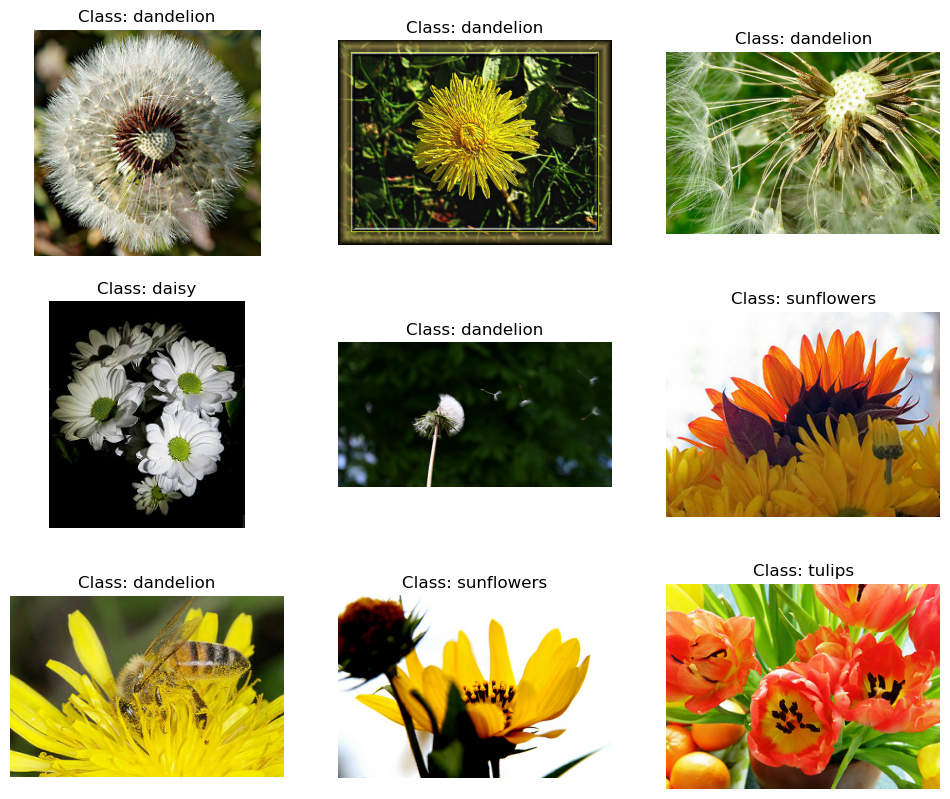

In [43]:
plt.figure(figsize=(12,10))
index = 0
for image, label in train_split_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")
    
plt.show()

Next we must preprocess the images. The CNN expects 224x224 images, so we need to resize them. We also need to run through Xception's `preprocess_input()` function:

In [5]:
# Basic Preprocessing
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

Appyling slightly fancier transformation to training set.

In [29]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0],shape[1]]) # getting minimum dimension of the image
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

In [31]:
def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

In [33]:
def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224,224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

Let's apply this preprocessing function to all three datasets, shuffle the training set and add batching and prefetching to all the datasets:

In [36]:
from functools import partial

batch_size = 32
train_set = train_split_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_split_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_split_raw.map(preprocess).batch(batch_size).prefetch(1)

2024-02-16 23:56:15.442589: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


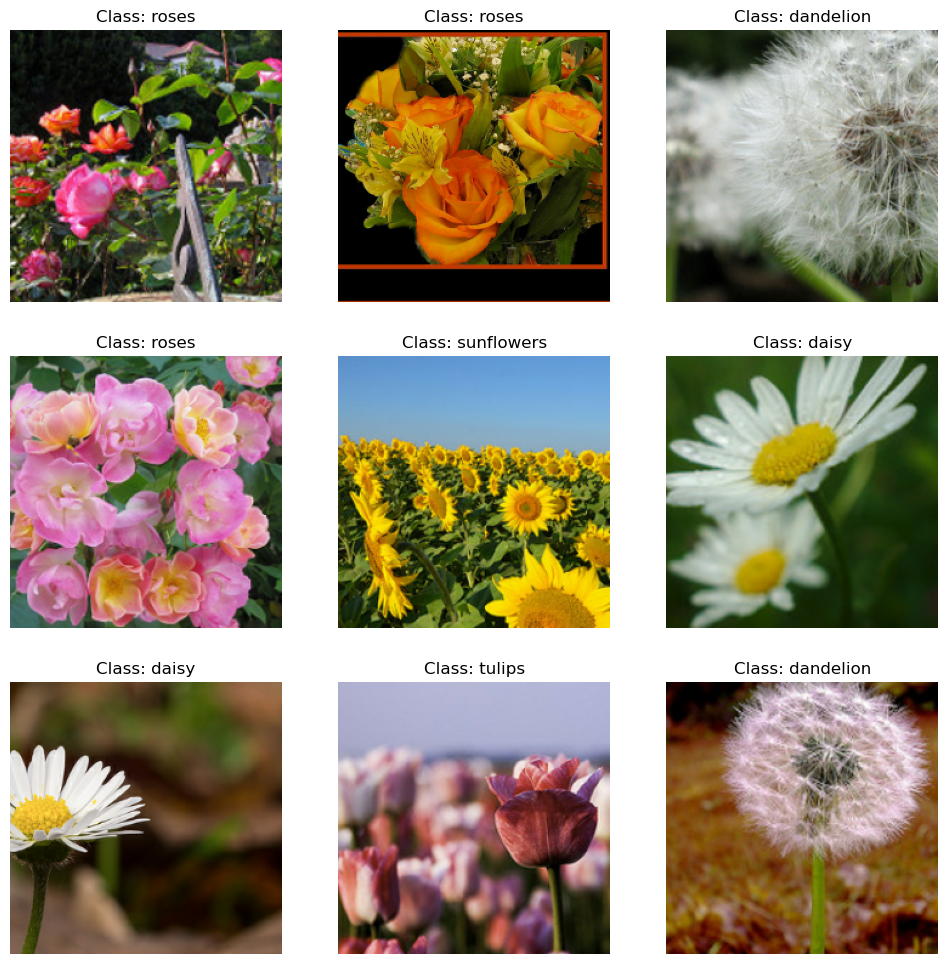

In [42]:
plt.figure(figsize=(12,12))
for X_batch, y_batch in train_set.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(X_batch[i] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[i]]))
        plt.axis("off")
        
plt.show()

2024-02-16 23:56:50.388922: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


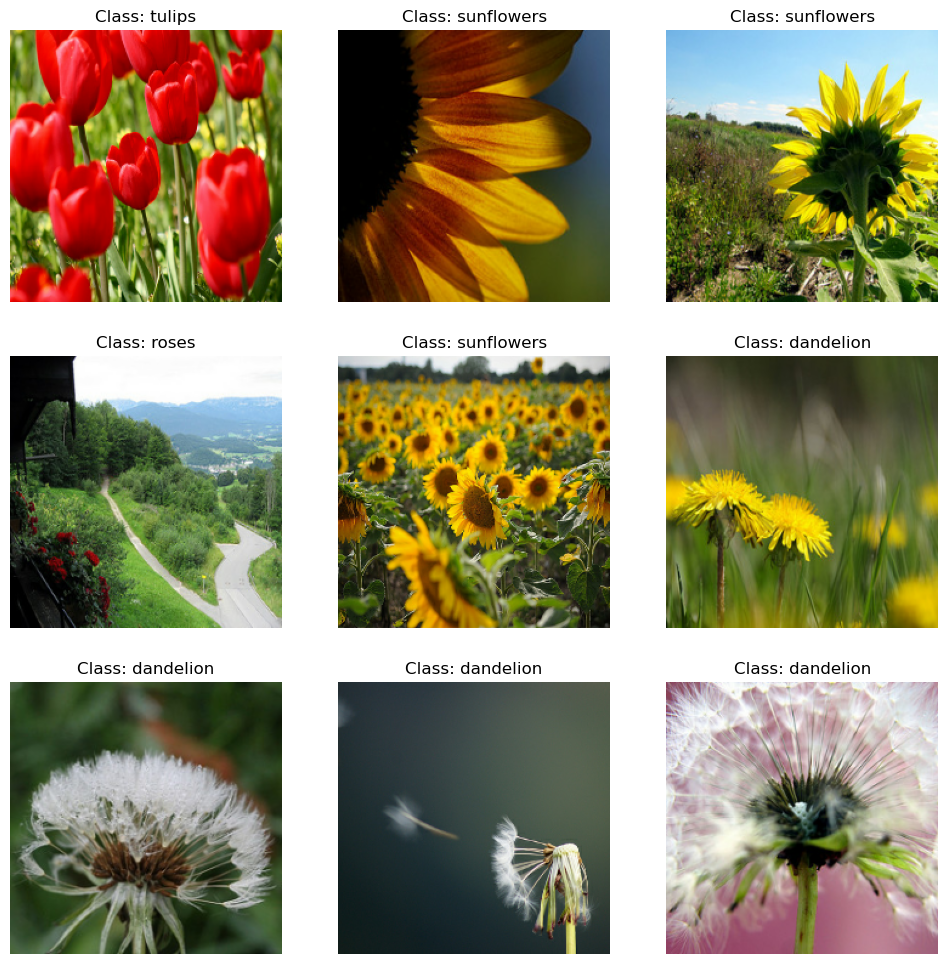

In [43]:
plt.figure(figsize=(12,12))
for X_batch, y_batch in test_set.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(X_batch[i] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[i]]))
        plt.axis("off")
        
plt.show()

Next let's load an Xception model, pretrained on ImageNet. We exclude the top of the network by setting the `include_top=False`: this excludes the global average pooling layer and the dense output layer. We then add our own global average pooling, based on the output of the base model, followed by a dense output layer with one unit per class, using the softmax activation function. Finally, we create the Keras model:

In [44]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 [==============================] - 27s 0us/step


In [45]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_1
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_2
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_act

It is good idea to freeze the weights of the pretrained layers, atleast at the beginning of training:

In [46]:
for layer in base_model.layers:
    layer.trainable = False

Finally, we can compile the model and start training:

In [ ]:
optimizer = keras.optimizers.legacy.SGD(learning_rate=0.2, momentum=0.9, decay=0.01) # decay is deprecated in new keras API. That's why using keras.optimizers.legacy.SGD
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# since we have use  "repeat()" dataset, that's why we need to give the steps also
history = model.fit(train_set, steps_per_epoch=int(0.75*dataset_size / batch_size),
                   validation_data=valid_set,
                   validation_steps=int(0.15*dataset_size/batch_size),
                   epochs=5)

The above process is very slow and thus I need to run it on GPU on collab.

After training the model for few epochs, its validation accuracy should reach about 75-80% and stop making progress. This means that the top layers are now pretty well trained, so we are ready to unfreeze all the layers. This time we use much lower learning rate to avoid damaging the pretrained weights:

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, decay=0.001) # decay is deprecated in new keras API. That's why using keras.optimizers.legacy.SGD
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# since we have use  "repeat()" dataset, that's why we need to give the steps also
history = model.fit(train_set, steps_per_epoch=int(0.75*dataset_size / batch_size),
                   validation_data=valid_set,
                   validation_steps=int(0.15*dataset_size/batch_size),
                   epochs=40)

It will take a while, but this model should reach around 95% accuracy on the test set. 